In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import io

In [24]:
qpcr_results = pd.read_excel("./20200326 LOD Study 2.xlsx", sheet_name="Results", skiprows=42, na_values=['Undetermined'])

# Standard Curve

In [25]:
sc = qpcr_results[qpcr_results['Sample Name'].str.contains('PCD')]

In [26]:
sc[['Sample Name', 'CT', 'Quantity', 'Amp Status']]

,Sample Name,CT,Quantity,Amp Status
8,PCD 1,18.166254,1.000000e+00,Inconclusive
9,PCD 1,18.119925,1.000000e+00,Inconclusive
10,PCD 1,17.801222,1.000000e+00,Inconclusive
19,PCD 2,22.880598,1.000000e-01,Amp
20,PCD 2,22.821129,1.000000e-01,Amp
21,PCD 2,22.389870,1.000000e-01,Amp
30,PCD 3,27.564375,1.000000e-02,Amp
31,PCD 3,27.531530,1.000000e-02,Amp
32,PCD 3,27.141530,1.000000e-02,Amp
39,PCD 4,31.699654,1.000000e-03,Amp


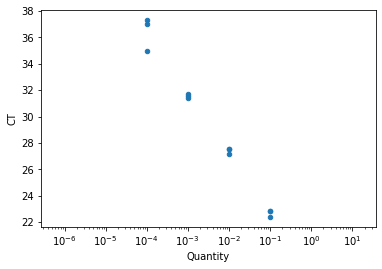

In [7]:
sc[sc['Amp Status'] == 'Amp'].plot.scatter(x='Quantity', y='CT', logx=True)

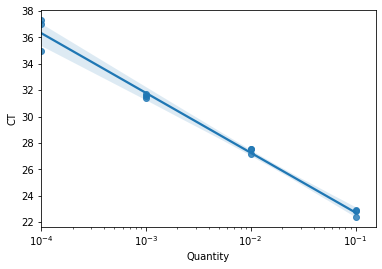

In [8]:
ax = sns.regplot(data=sc[sc['Amp Status'] == 'Amp'], x='Quantity', y='CT', logx=True)
ax.set_xscale('log')

In [130]:
sc[['Sample Name', 'Quantity', 'Amp Status']]

,Sample Name,Quantity,Amp Status
15,PCD 1,1000000.0,Amp
16,PCD 1,1000000.0,Inconclusive
17,PCD 1,1000000.0,No Amp
33,PCD 2,100000.0,Amp
34,PCD 2,100000.0,Amp
35,PCD 2,100000.0,Amp
51,PCD 3,10000.0,Amp
52,PCD 3,10000.0,Amp
53,PCD 3,10000.0,Amp
69,PCD 4,1000.0,Amp


# Negative Controls

In [9]:
negs = qpcr_results.loc[qpcr_results['Sample Name'].str.contains('Negative')]
negs

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,...,Automatic Ct Threshold,Ct Threshold,Automatic Baseline,Baseline Start,Baseline End,Amp Status,Comments,CQCONF,EXPFAIL,HIGHSD
6,6,A6,False,Negative,FAM,UNKNOWN,FAM,NFQ-MGB,NaN,NaN,...,True,27334.466492,True,3,49,No Amp,NaN,Y,Y,N
7,6,A6,False,Negative,VIC,UNKNOWN,VIC,NFQ-MGB,NaN,NaN,...,True,4505.769889,True,3,49,No Amp,NaN,Y,Y,N
17,18,B6,False,Negative,FAM,UNKNOWN,FAM,NFQ-MGB,NaN,NaN,...,True,27334.466492,True,3,3,No Amp,NaN,Y,N,N
18,18,B6,False,Negative,VIC,UNKNOWN,VIC,NFQ-MGB,NaN,NaN,...,True,4505.769889,True,3,49,No Amp,NaN,Y,Y,N
28,30,C6,False,Negative,FAM,UNKNOWN,FAM,NFQ-MGB,NaN,NaN,...,True,27334.466492,True,3,3,No Amp,NaN,Y,N,N
29,30,C6,False,Negative,VIC,UNKNOWN,VIC,NFQ-MGB,NaN,NaN,...,True,4505.769889,True,3,40,No Amp,NaN,Y,N,N


In [18]:
negs['Amp Status'].str.match('Amp').any()

False

In [17]:
negs

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,...,Automatic Ct Threshold,Ct Threshold,Automatic Baseline,Baseline Start,Baseline End,Amp Status,Comments,CQCONF,EXPFAIL,HIGHSD
6,6,A6,False,Negative,FAM,UNKNOWN,FAM,NFQ-MGB,NaN,NaN,...,True,27334.466492,True,3,49,No Amp,NaN,Y,Y,N
7,6,A6,False,Negative,VIC,UNKNOWN,VIC,NFQ-MGB,NaN,NaN,...,True,4505.769889,True,3,49,No Amp,NaN,Y,Y,N
17,18,B6,False,Negative,FAM,UNKNOWN,FAM,NFQ-MGB,NaN,NaN,...,True,27334.466492,True,3,3,No Amp,NaN,Y,N,N
18,18,B6,False,Negative,VIC,UNKNOWN,VIC,NFQ-MGB,NaN,NaN,...,True,4505.769889,True,3,49,No Amp,NaN,Y,Y,N
28,30,C6,False,Negative,FAM,UNKNOWN,FAM,NFQ-MGB,NaN,NaN,...,True,27334.466492,True,3,3,No Amp,NaN,Y,N,N
29,30,C6,False,Negative,VIC,UNKNOWN,VIC,NFQ-MGB,NaN,NaN,...,True,4505.769889,True,3,40,No Amp,NaN,Y,N,N


# CoV

In [38]:
ncov = qpcr_results[(qpcr_results['Reporter'] == 'FAM') & qpcr_results['Sample Name'].str.contains('nCoV')]

In [39]:
ncov.sort_values(by='Sample Name')

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,...,Automatic Ct Threshold,Ct Threshold,Automatic Baseline,Baseline Start,Baseline End,Amp Status,Comments,CQCONF,EXPFAIL,HIGHSD
0,1,A1,False,1 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,31.653728,31.653728,...,True,27334.466492,True,3,24,Amp,NaN,N,N,N
13,14,B2,False,10 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,39.008568,39.008568,...,True,27334.466492,True,3,33,Amp,NaN,N,N,N
24,26,C2,False,11 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,35.918472,35.918472,...,True,27334.466492,True,3,30,Amp,NaN,N,N,N
35,38,D2,False,12 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,36.111988,36.111988,...,True,27334.466492,True,3,27,Amp,NaN,N,N,N
44,50,E2,False,13 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,37.087017,37.087017,...,True,27334.466492,True,3,31,Amp,NaN,N,N,N
53,62,F2,False,14 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,NaN,NaN,...,True,27334.466492,True,3,3,Inconclusive,NaN,Y,N,N
64,74,G2,False,15 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,35.264385,35.264385,...,True,27334.466492,True,3,29,Amp,NaN,N,N,N
75,86,H2,False,16 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,39.827530,39.827530,...,True,27334.466492,True,3,33,Amp,NaN,N,N,N
4,3,A3,False,17 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,38.119884,36.077076,...,True,27334.466492,True,3,30,Amp,NaN,N,N,Y
15,15,B3,False,18 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,NaN,39.008568,...,True,27334.466492,True,3,3,No Amp,NaN,Y,N,N


In [40]:
ncov.loc[:, 'Sample Number'] = ncov['Sample Name'].str.replace(r'[\D]*([0-9]+)[\D]*', r'\1').astype(np.int)

/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


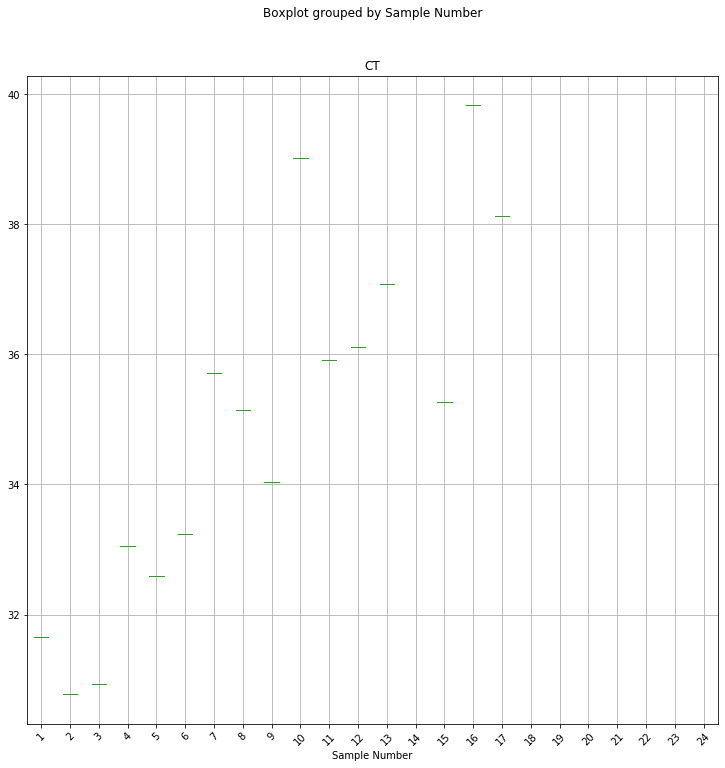

In [41]:
ncov.boxplot(by='Sample Number', column='CT', rot=45, figsize=(12,12))

In [42]:
sample_data = '''
Sample Number	NP Sample	"Spike"	Control	"Control Conc"	"Volume"
1		1000	PCD 1	2.00E+05	5
2		1000	PCD 1	2.00E+05	5
3		1000	PCD 1	2.00E+05	5
4		200	PCD 1	2.00E+05	1
5		200	PCD 1	2.00E+05	1
6		200	PCD 1	2.00E+05	1
7		100	PCD 2	2.00E+04	5
8		100	PCD 2	2.00E+04	5
9		100	PCD 2	2.00E+04	5
10		50	PCD 2	2.00E+04	2.5
11		50	PCD 2	2.00E+04	2.5
12		50	PCD 2	2.00E+04	2.5
13		20	PCD 2	2.00E+04	1
14		20	PCD 2	2.00E+04	1
15		20	PCD 2	2.00E+04	1
16		10	PCD 3	2.00E+03	5
17		10	PCD 3	2.00E+03	5
18		10	PCD 3	2.00E+03	5
19		2	PCD 3	2.00E+03	1
20		2	PCD 3	2.00E+03	1
21		2	PCD 3	2.00E+03	1
22		0	NEG	0	0
23		0	NEG	0	0
24		0	NEG	0	0'''

sample_data = pd.read_table(io.StringIO(sample_data))

In [43]:
ncov = ncov.merge(sample_data)

In [87]:
ncov['CT'].unique()

array([31.653728, 34.034267, 38.119884, 30.77735 , 39.008568,       nan,
       30.9369  , 35.918472, 33.05283 , 36.111988, 32.589024, 37.087017,
       33.245304, 35.715527, 35.264385, 35.145718, 39.82753 ])

In [73]:
ncov['Spike'].unique()

array([1000,  100,   10,   50,    2,  200,   20,    0])

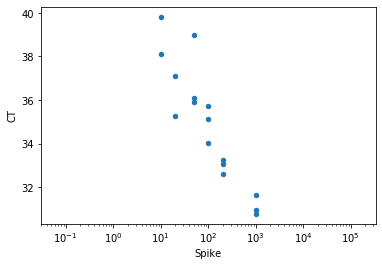

In [81]:
ncov.plot.scatter(x='Spike', y='CT', logx=True)

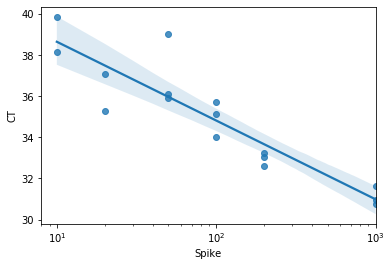

In [88]:
ax = sns.regplot(data=ncov, x='Spike', y='CT', logx=True)
ax.set_xscale('log')

## Yield

In [51]:
ncov['Quantity'] = ncov['Quantity'] * 1e6

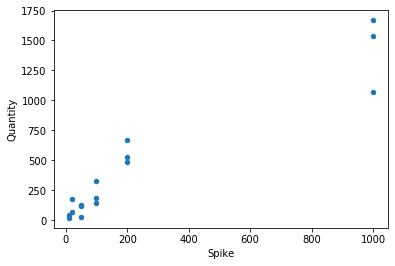

In [52]:
ncov.plot.scatter(x='Spike', y='Quantity')

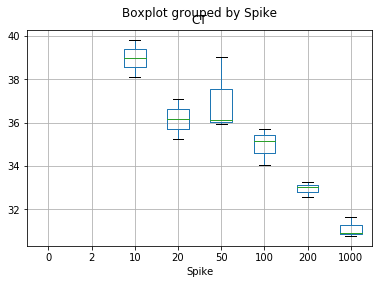

In [53]:
ncov.boxplot(by='Spike', column='CT')

In [54]:
ncov['RNA Input'] = ncov['Spike'] * 400 / 30 * 5

In [55]:
ncov.loc[:,'Yield'] = ncov['Quantity'] / ncov['RNA Input']

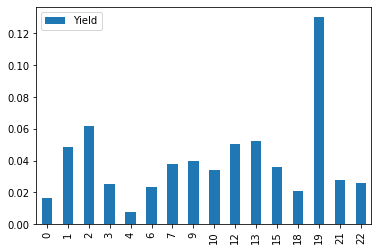

In [66]:
ncov[ncov['Yield'] < 1][['Sample Name','Yield']].plot.bar()

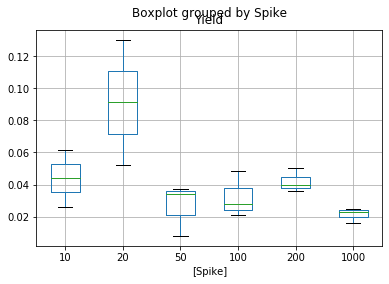

In [70]:
ncov[['Sample Name','Spike','Yield']].dropna().boxplot(by='Spike')

In [57]:
ncov[ncov['Yield'] < 1]['Yield'].describe()

count    16.000000
mean      0.039805
std       0.028098
min       0.007897
25%       0.024551
50%       0.035042
75%       0.048908
max       0.130356
Name: Yield, dtype: float64

Text(0, 0.5, 'Yield (%)')

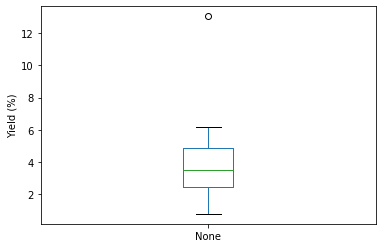

In [62]:
((ncov['Quantity'] * 6) / (ncov['Spike'] * 400) * 100).plot.box()
plt.ylabel("Yield (%)")

## Diag

In [151]:
pos = qpcr_results[qpcr_results['Sample Name']=='PCD 1']
(pos['CT'] > 16).all()
(pos['CT'] < 23).all()

False

In [152]:
pos

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,...,Ct Threshold,Automatic Baseline,Baseline Start,Baseline End,Amp Status,Comments,CQCONF,EXPFAIL,HIGHSD,OUTLIERRG
15,10,A10,False,PCD 1,FAM,STANDARD,FAM,NFQ-MGB,18.190771,22.210115,...,19635.94988,True,3,12,Amp,NaN,N,N,Y,N
16,11,A11,False,PCD 1,FAM,STANDARD,FAM,NFQ-MGB,18.221386,22.210115,...,19635.94988,True,3,12,Inconclusive,NaN,N,N,Y,N
17,12,A12,False,PCD 1,FAM,STANDARD,FAM,NFQ-MGB,30.218191,22.210115,...,19635.94988,True,3,23,No Amp,NaN,Y,N,Y,Y


In [154]:
neg = qpcr_results[(qpcr_results['Sample Name']=='Negative') & (qpcr_results['Target Name'] == 'FAM')]
neg

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,...,Ct Threshold,Automatic Baseline,Baseline Start,Baseline End,Amp Status,Comments,CQCONF,EXPFAIL,HIGHSD,OUTLIERRG
117,79,G7,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,39.116722,...,19635.94988,True,3,18,No Amp,NaN,N,N,N,N
119,80,G8,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,39.116722,...,19635.94988,True,3,3,Inconclusive,NaN,N,N,N,N
121,81,G9,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,39.116722,...,19635.94988,True,3,3,Inconclusive,NaN,N,N,N,N
138,91,H7,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,39.116722,...,19635.94988,True,3,5,No Amp,NaN,N,N,N,N
140,92,H8,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,39.116722,...,19635.94988,True,3,12,No Amp,NaN,N,N,N,N
142,93,H9,False,Negative,FAM,NTC,FAM,NFQ-MGB,39.116722,39.116722,...,19635.94988,True,3,29,Amp,NaN,N,N,N,N


In [155]:
ierc = qpcr_results[(qpcr_results['Reporter'] == 'VIC') & qpcr_results['Sample Name'].str.contains('nCoV')]

In [161]:
ierc['CT'].describe()

count    47.000000
mean     29.528721
std       2.187122
min      25.360426
25%      28.330387
50%      29.370909
75%      30.621604
max      34.620770
Name: CT, dtype: float64

In [165]:
ierc.sort_values(by='Sample Name')[['Sample Name','CT','Amp Status']]

,Sample Name,CT,Amp Status
1,1 nCoV,25.360426,Amp
21,10 nCoV,28.542322,Amp
39,11 nCoV,25.463104,Amp
57,12 nCoV,28.797892,Amp
75,13 nCoV,28.692413,Amp
93,14 nCoV,27.194056,Amp
108,15 nCoV,28.314098,Amp
129,16 nCoV,29.451605,Amp
5,17 nCoV,27.531984,Amp
23,18 nCoV,27.700287,Amp


In [173]:
ncov.sort_values(by='Sample Number')[['Sample Name','CT','Spike','Amp Status']]

,Sample Name,CT,Spike,Amp Status
0,1 nCoV,29.687054,1000,Amp
6,2 nCoV,29.889180,1000,Amp
12,3 nCoV,33.578920,1000,Amp
18,4 nCoV,32.816510,200,Amp
24,5 nCoV,32.097412,200,Amp
30,6 nCoV,31.407583,200,Amp
36,7 nCoV,33.414970,100,Amp
42,8 nCoV,33.956720,100,Amp
1,9 nCoV,33.303745,100,Amp
7,10 nCoV,34.759296,50,Amp


In [215]:
neg['CT'].mean()

39.116722

In [239]:
diags = list()
for i in range(1,48):
    name = "{} nCoV".format(i) 
    
    sample_data = qpcr_results[qpcr_results['Sample Name'] == '{} nCoV'.format(i)].set_index('Target Name')
    ierc = sample_data.loc['VIC']
    ncov = sample_data.loc['FAM']
    
    result = {
        'Sample Name': name, 
        'Result': 'Unknown', 
        'Type': 'Unknown', 
        'CT': ncov['CT'], 
        'Quantity': ncov['Quantity'],
        'IECRNA CT': ierc['CT']}
    
    if ncov['Amp Status'] == 'Amp':
        result['Result'] = 'Positive'
        if ncov['CT'] <= 30 or ierc['Amp Status'] == 'Amp':
            result['Type'] = 'Quantitative'
        elif ncov['CT'] > 30 and ierc['Amp Status'] == 'No Amp':
            result['Type'] = 'Qualitative'
    else:
        if ierc['Amp Status'] == 'Amp':
            result['Result'] = 'Negative'
            result['Type'] = 'Qualitative'
        else:
            result['Type'] = 'Sample Failure'
            
    diags.append(result)
            
diags = pd.DataFrame(diags)
diags

,Sample Name,Result,Type,CT,Quantity,IECRNA CT
0,1 nCoV,Positive,Quantitative,29.687054,786.836670,25.360426
1,2 nCoV,Positive,Quantitative,29.889180,675.741821,28.412330
2,3 nCoV,Positive,Quantitative,33.578920,41.983311,31.666440
3,4 nCoV,Positive,Quantitative,32.816510,74.544815,29.382320
4,5 nCoV,Positive,Quantitative,32.097412,128.113022,29.098305
5,6 nCoV,Positive,Quantitative,31.407583,215.375900,25.952955
6,7 nCoV,Positive,Quantitative,33.414970,47.500126,28.856703
7,8 nCoV,Positive,Quantitative,33.956720,31.587828,29.370909
8,9 nCoV,Positive,Quantitative,33.303745,51.649982,26.678446
9,10 nCoV,Positive,Quantitative,34.759296,17.260052,28.542322


# Curves

In [175]:
qpcr_amp_data = pd.read_excel("./20200328 LOD.xlsx", sheet_name="Amplification Data", skiprows=42, na_values=['Undetermined'])

In [178]:
qpcr_amp_data = qpcr_amp_data.merge(qpcr_results[['Well', 'Sample Name']])

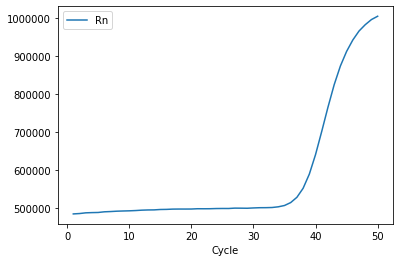

In [193]:
qpcr_amp_data[(qpcr_amp_data['Sample Name'] == '15 nCoV') & (qpcr_amp_data['Target Name'] == 'FAM')].plot(x='Cycle', y='Rn')